**Concrete Strength Prediction Model**

***Library Imports***

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

***Dataset Initialization***

In [50]:
# Loading the dataset
csdata = pd.read_csv('Concrete Compressive Strength.csv')
csdata.head()  #Displays the first 5 rows of the dataset     
#csdata.isnull().sum()   #Checking for missing values'''               

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


***Correlation Matrix***

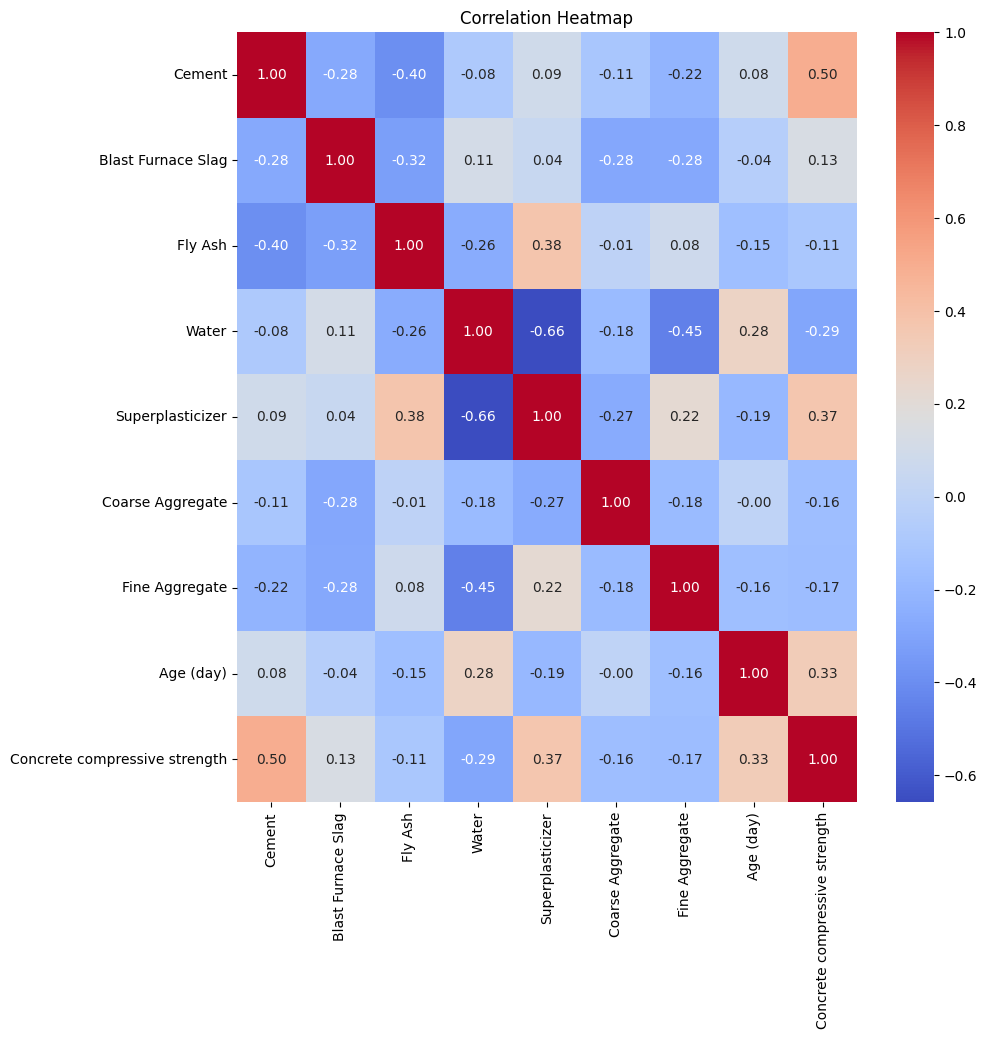

In [51]:
plt.figure(figsize=(10, 10))
sns.heatmap(csdata.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')    
plt.show()

***Feature Distribution***

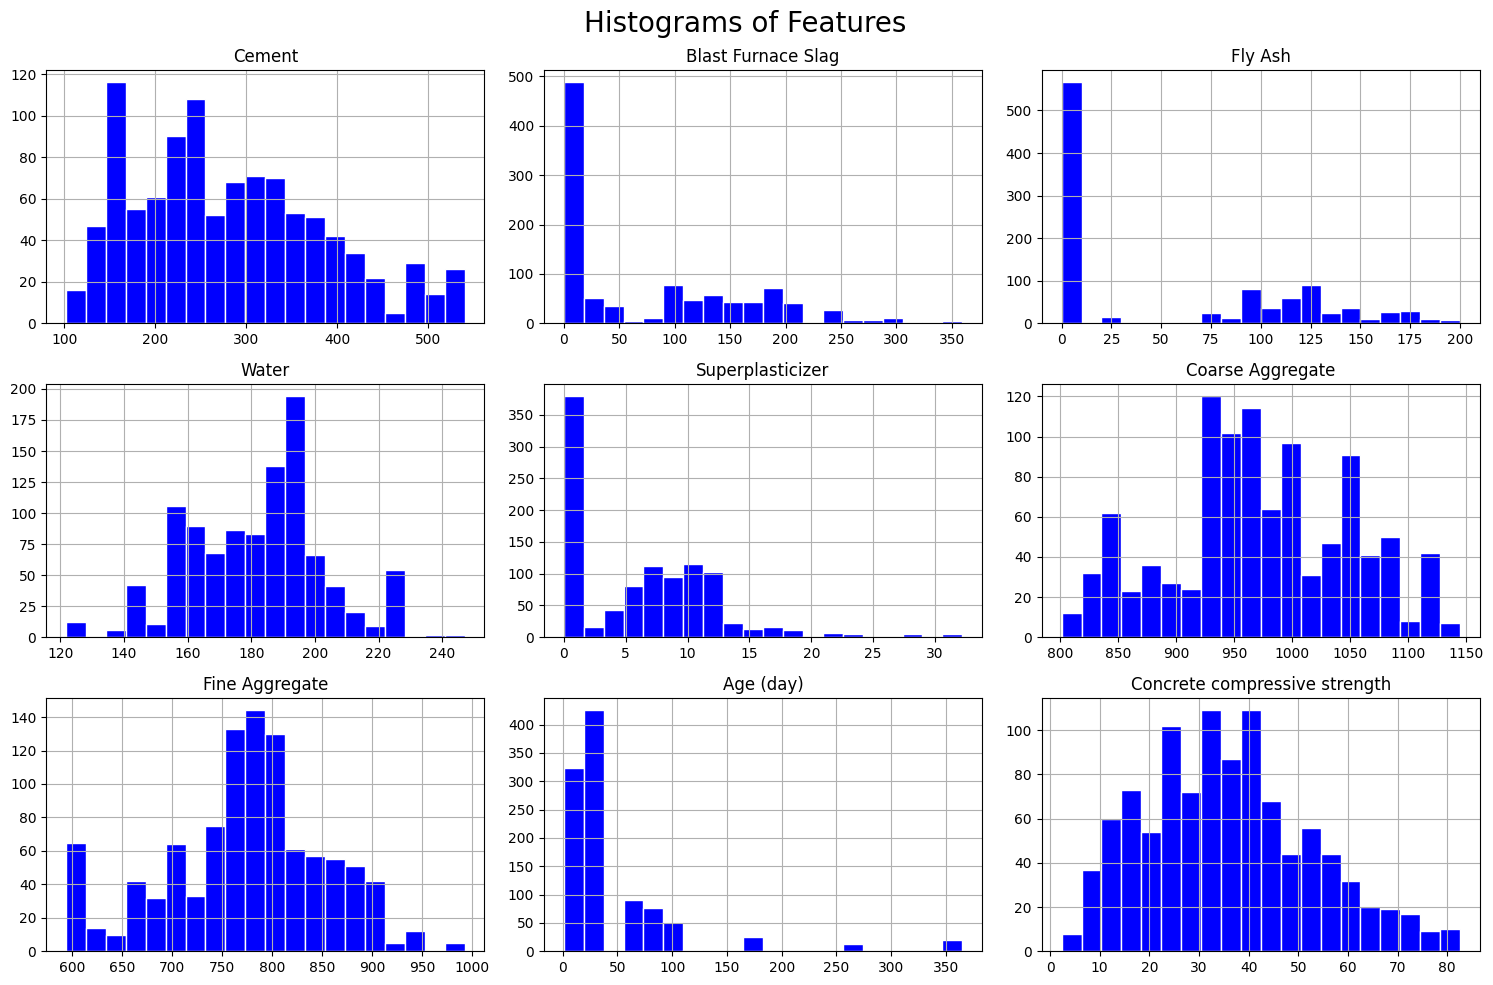

In [52]:
csdata.hist(figsize=(15, 10), bins=20, color='blue', edgecolor='white')
plt.suptitle('Histograms of Features', fontsize=20) 
plt.tight_layout()
plt.show()

***Scatter Plots of Features vs Target Variable***


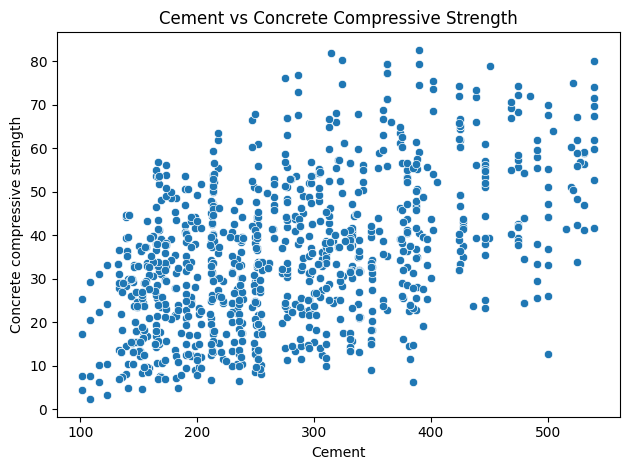

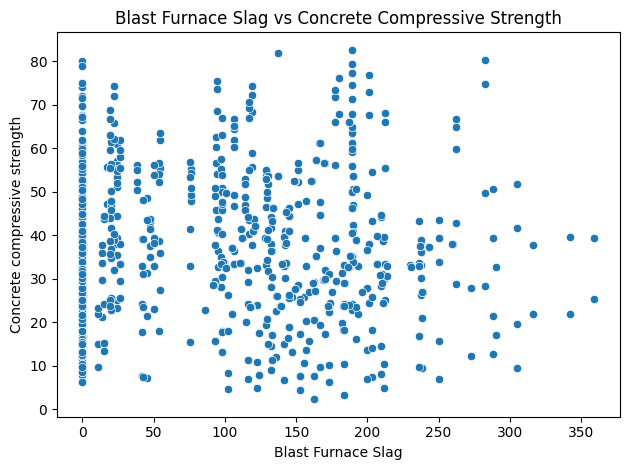

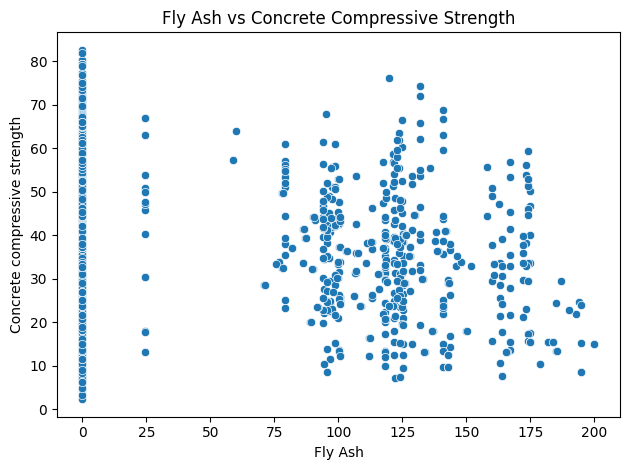

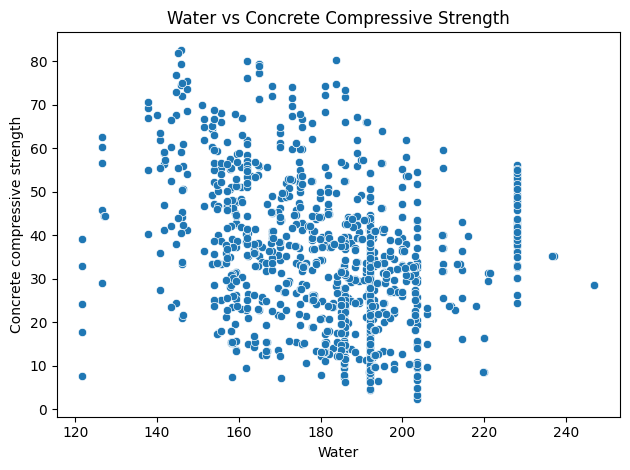

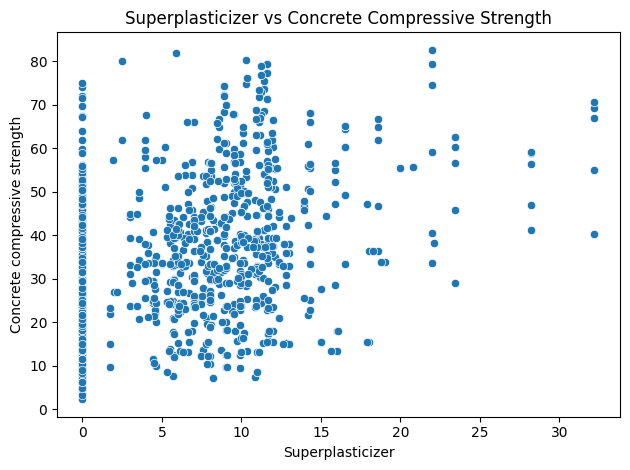

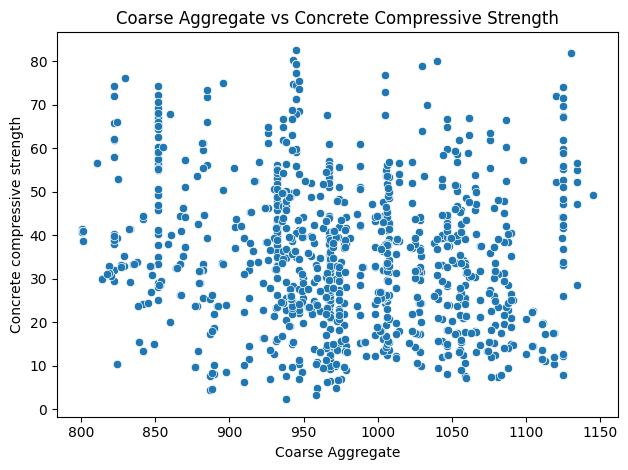

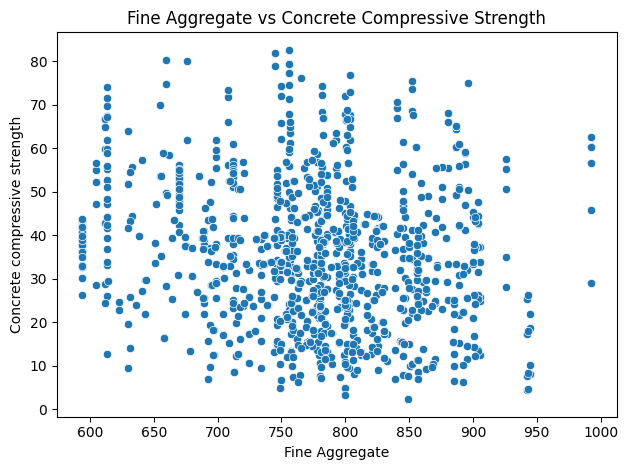

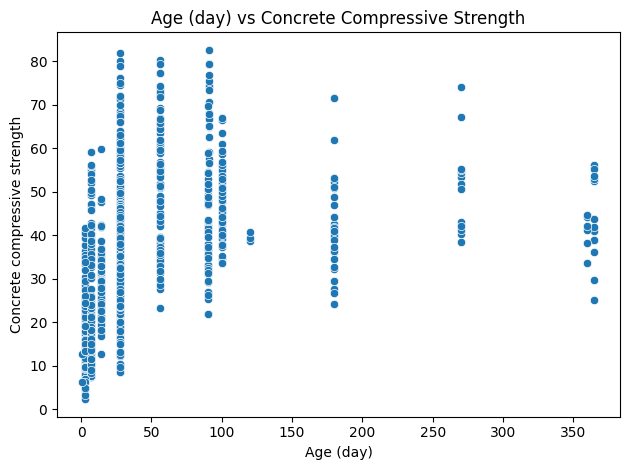

In [53]:
for column in csdata.columns[:-1]:
    sns.scatterplot(x = column, y = 'Concrete compressive strength', data = csdata)
    plt.title(f'{column} vs Concrete Compressive Strength')
    plt.xlabel(column)
    plt.tight_layout() 
    plt.show()

***Data Preprocessing***

In [54]:
#Storing Input Features
X = csdata.drop('Concrete compressive strength', axis=1)  #Removes the Compressive Strength target variable 

#Storing Target Variables
y = csdata['Concrete compressive strength']                   #Creates a new DataFrame with the Compressive Strength target variable

***Feature Scaling***

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  #Standardizing the input features

***Data Splitting into Training and Testing Sets***

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

***Model Training***

***---Linear Regression Model---***

In [57]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

#Evaluating the Linear Regression Model
lr_mse = root_mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {lr_mse:.2f}')
print(f'Linear Regression Root Mean Squared Error: {lr_rmse:.2f}')
print(f'Linear Regression R^2 Score: {lr_r2:.2f}')

Linear Regression Mean Squared Error: 9.80
Linear Regression Root Mean Squared Error: 3.13
Linear Regression R^2 Score: 0.63


***---Decision Tree Regressor---***

In [58]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

#Evaluating the Decision Tree Regressor Model
dt_mse = root_mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)       
dt_r2 = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {dt_mse:.2f}')
print(f'Decision Tree Root Mean Squared Error: {dt_rmse:.2f}')
print(f'Decision Tree R^2 Score: {dt_r2:.2f}')

Decision Tree Mean Squared Error: 6.98
Decision Tree Root Mean Squared Error: 2.64
Decision Tree R^2 Score: 0.81


***---Random Forest Regressor---***

In [59]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#Evaluating the Random Forest Regressor Model
rf_mse = root_mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {rf_mse:.2f}')
print(f'Random Forest Root Mean Squared Error: {rf_rmse:.2f}')
print(f'Random Forest R^2 Score: {rf_r2:.2f}')


Random Forest Mean Squared Error: 5.47
Random Forest Root Mean Squared Error: 2.34
Random Forest R^2 Score: 0.88


***Prediction Visualization***

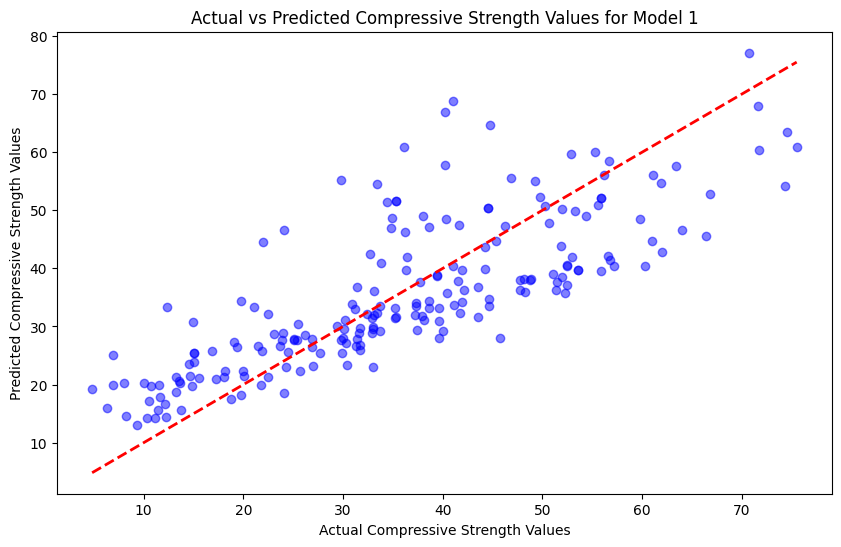

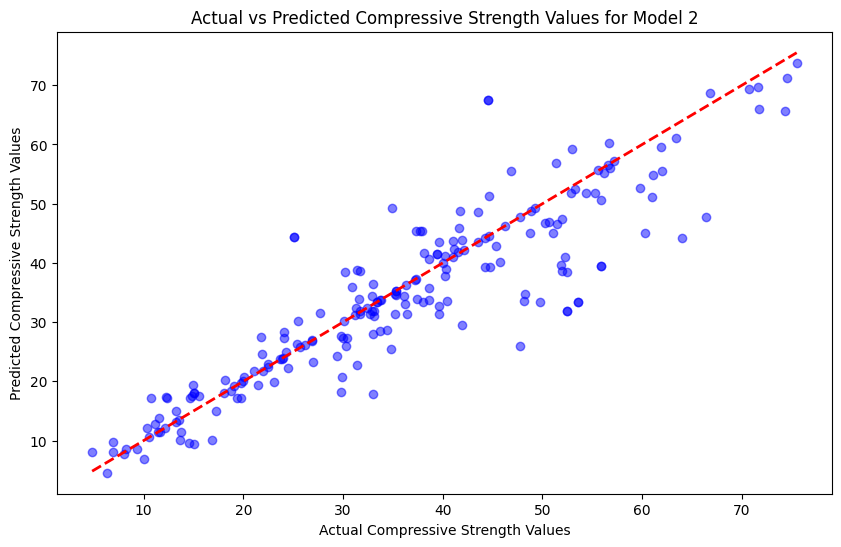

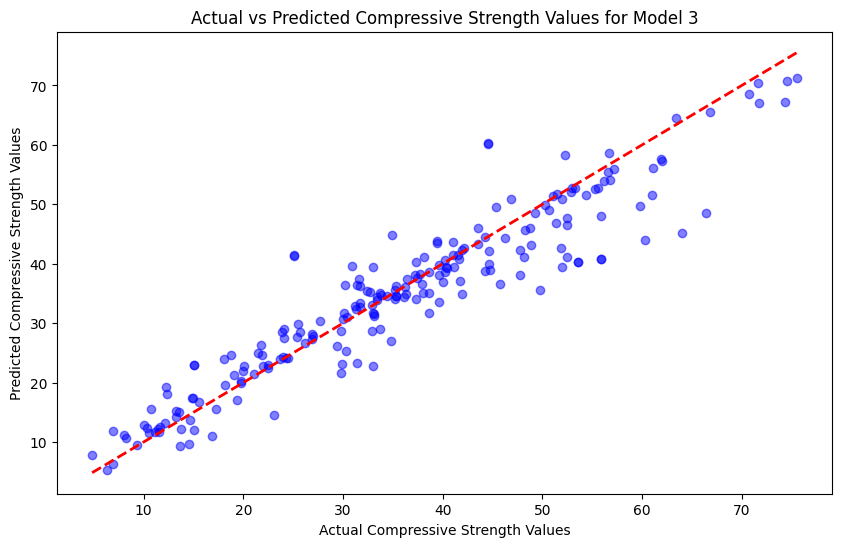

In [60]:
y_vales = [y_pred_lr, y_pred_dt, y_pred_rf]

for i in range(len(y_vales)):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(y_test,y_vales[i], color='blue', alpha=0.5)      
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Compressive Strength Values') 
    ax.set_ylabel('Predicted Compressive Strength Values')
    ax.set_title(f'Actual vs Predicted Compressive Strength Values for Model {i+1}')

In [61]:
import joblib
joblib.dump(rf_model, 'Concrete_Strength_Prediction_Model.pkl')

['Concrete_Strength_Prediction_Model.pkl']

***---Random Forest Regressor Hyperparameter Tuning---***

In [62]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


pipeline = Pipeline([
    ('scaler', StandardScaler()),              # Feature scaling
    ('poly', PolynomialFeatures(degree=2)),    # Feature expansion
    ('rf_model', RandomForestRegressor(random_state=42))
])


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define hyperparameter grid
param_grid = {
    'rf_model__n_estimators': [100, 200],
    'rf_model__max_depth': [5, 10, None],
    'rf_model__min_samples_split': [2, 5],
    'poly__degree': [1, 2]  
}

grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    cv = cv,
    scoring = 'neg_root_mean_squared_error',  # or 'r2', 'neg_mean_absolute_error'
    n_jobs = -1,  # parallel processing
    verbose = 2)

# Fit to training data
grid_search.fit(X_train, y_train)

# Extract and evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE from CV:", -grid_search.best_score_)
print("R² on Test Set:", r2_score(y_test, y_pred))
print("Test MSE:", root_mean_squared_error(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'poly__degree': 1, 'rf_model__max_depth': None, 'rf_model__min_samples_split': 2, 'rf_model__n_estimators': 200}
Best RMSE from CV: 5.336696578413017
R² on Test Set: 0.8796783390110453
Test MSE: 5.568178923538718


### Visualize Feature Importances

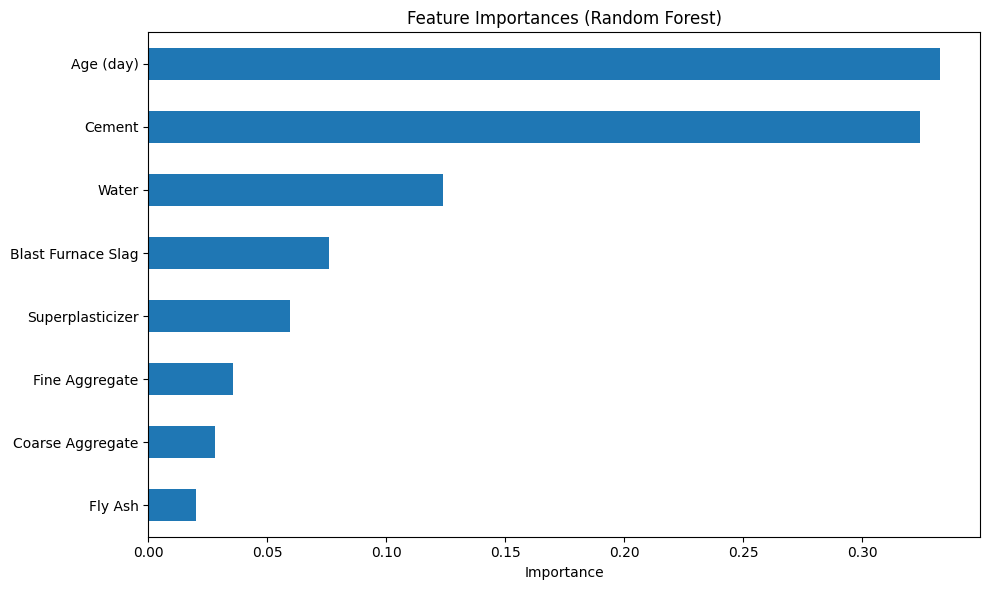

In [63]:
poly = grid_search.best_estimator_.named_steps['poly']
feature_names = poly.get_feature_names_out(input_features=X.columns)

rf = grid_search.best_estimator_.named_steps['rf_model']
importances = np.array(rf.feature_importances_)
mask = feature_names != '1'

feature_names = poly.get_feature_names_out(input_features=X.columns)

# Filter out the intercept
filtered_names = feature_names[mask]
filtered_importances = importances[mask]

# Plot
pd.Series(filtered_importances, index=filtered_names).sort_values().plot(
    kind='barh', figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

### Removing Low Impact Features

In [64]:
low_impact_features = ['Fly Ash', 'Superplasticizer', 'Blast Furnace Slag']
X_reduced = X.drop(columns=low_impact_features)


### Updating the model

In [65]:
from sklearn.preprocessing import FunctionTransformer
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42)


# Adding Water-to-cement ratio feature
def add_new_features(X):
    X = X.copy()
    X['w_c_ratio'] = X['Water'] / (X['Cement'] + 1e-6)
    return X

add_features = FunctionTransformer(add_new_features, validate=False)

### Model Building and Training

In [66]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('add_features', add_features),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('add_features',
                                        FunctionTransformer(func=<function add_new_features at 0x000001A872A73640>)),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'model__max_depth': [None, 10],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error')

### Model Evaluation

In [67]:
y_pred = grid.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))
print("Test RMSE:", root_mean_squared_error(y_test, y_pred))

Test R²: 0.8690943624354162
Test RMSE: 5.807917623802677


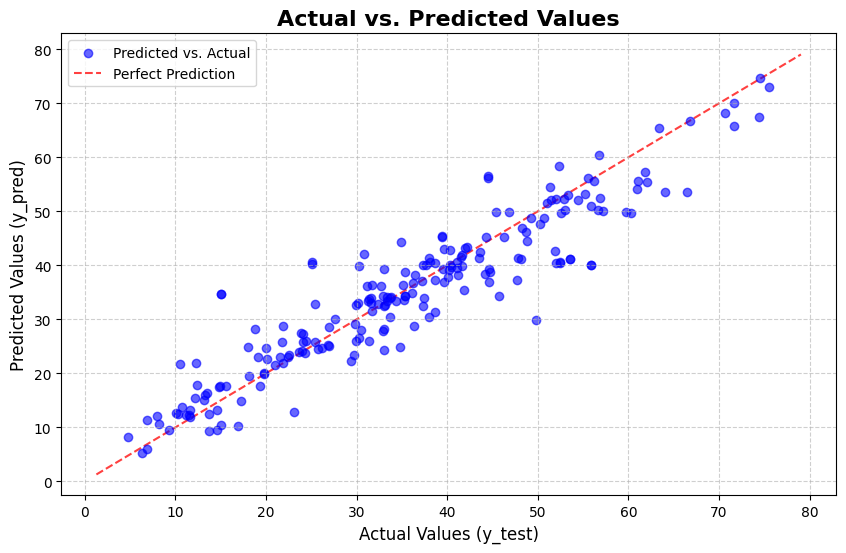

In [68]:

fig, ax= plt.subplots(figsize = (10, 6))
ax.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs. Actual')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
]
ax.plot(lims, lims, 'r--', alpha=0.75, zorder=0, label='Perfect Prediction')

ax.set_xlabel("Actual Values (y_test)", fontsize=12)
ax.set_ylabel("Predicted Values (y_pred)", fontsize=12)
ax.set_title("Actual vs. Predicted Values", fontsize=16, fontweight='bold')

ax.grid(True, linestyle='--', alpha=0.6)

ax.legend()

plt.show()

### Save Tuned Model

In [69]:
import joblib
joblib.dump(grid.best_estimator_, 'CSP_rf.pkl')

['CSP_rf.pkl']